# Exporatory analysis: stratifying by sex

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn colors
#https://python-graph-gallery.com/100-calling-a-color-with-seaborn/

## 1. Load data 

Load data that has been pre-processed as for 00_SetUp and have a first look at the variables. 

In [2]:
#os.getcwd()
#os.listdir('../data/')

#df_legs = pd.read_csv(r'..\data\interim\legs.csv', dtype = {'VORIHORAINI':str, 'VDESHORAFIN':str})
#df_trips = pd.read_csv(r'..\data\interim\trips.csv', dtype = {'VORIHORAINI':str, 'VDESHORAFIN':str})
df_people = pd.read_csv(r'../data/interim/people.csv', dtype = {'VORIHORAINI':str, 'VDESHORAFIN':str})

codes = pd.read_csv(r'../data/processed/codes_translated.csv', dtype = {'CODE': float})

print('Uploaded data: ', (df_people.shape)[0], 'observations', 'for', (df_people.shape)[1], 'variables.')
# https://stackoverflow.com/questions/42654934/need-of-using-r-before-path-name-while-reading-a-csv-file-with-pandas

Uploaded data:  85064 observations for 51 variables.


In [3]:
df_people.head()

,ID_HOGAR,ID_IND,CODMUNI,NOMMUNI,CODPROV,NOMPROV,ZT1259,CZ208,ELE_HOGAR_NUEVO,TIPO_ENCUESTA_hog,...,C14ABONO,DDIA,DMES,DANNO,DIASEM,DNOVIAJO,C11ZT1259,C12ZT1259,CPMR,TIPO_ENCUESTA_ind
0,189,1,2,AJALVIR,28,MADRID,002-002,60,69.902334,CAPI,...,NaN,25,4,2018,3,NaN,104-001B,NaN,2,CAPI
1,189,2,2,AJALVIR,28,MADRID,002-002,60,69.902334,CAPI,...,1.0,25,4,2018,3,2.0,NaN,NaN,2,CAPI
2,244,1,2,AJALVIR,28,MADRID,002-002,60,67.889119,CAPI,...,NaN,26,4,2018,4,NaN,104-001B,NaN,2,CAPI
3,244,2,2,AJALVIR,28,MADRID,002-002,60,67.889119,CAPI,...,2.0,26,4,2018,4,NaN,NaN,NaN,2,CAPI
4,324,1,2,AJALVIR,28,MADRID,002-002,60,79.174900,CAPI,...,NaN,25,4,2018,3,NaN,NaN,NaN,2,CAPI


In [4]:
print(df_people.columns)

Index(['ID_HOGAR', 'ID_IND', 'CODMUNI', 'NOMMUNI', 'CODPROV', 'NOMPROV',
       'ZT1259', 'CZ208', 'ELE_HOGAR_NUEVO', 'TIPO_ENCUESTA_hog', 'A1PER',
       'A2PER4', 'B1NVE', 'V1B11TIPO', 'V1B12CARB', 'V1B13EST', 'V2B11TIPO1',
       'V2B12CARB1', 'V2B13EST1', 'V3B11TIPO1', 'V3B12CARB1', 'V3B13EST1',
       'V4B11TIPO1', 'V4B12CARB1', 'V4B13EST1', 'V5B11TIPO1', 'V5B12CARB1',
       'V5B13EST1', 'N_MIEMBROS_POR_HOGAR', 'N_VIAJES_POR_HOGAR', 'C2SEXO',
       'EDAD_FIN', 'ELE_G_POND', 'C4NAC', 'C5CAM', 'C6CARNE', 'C7ESTUD',
       'C8ACTIV', 'C9PROF', 'C10SECTOR', 'C13TARJETA', 'C14ABONO', 'DDIA',
       'DMES', 'DANNO', 'DIASEM', 'DNOVIAJO', 'C11ZT1259', 'C12ZT1259', 'CPMR',
       'TIPO_ENCUESTA_ind'],
      dtype='object')


## 2. Recode Sex and check distribution

In [5]:
conditions = [
    df_people['C2SEXO'] == 1,
    df_people['C2SEXO'] == 2
]

outputs = [
    'Male', 'Female'
]

df_people['Sex'] = np.select(conditions, outputs, 'Other') 
df_people['Sex'].value_counts()

Female    46055
Male      39009
Name: Sex, dtype: int64

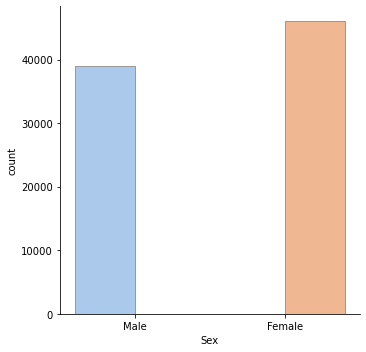

In [6]:
sns.catplot(x="Sex", hue="Sex", kind="count",
            palette="pastel", edgecolor=".6",
            data=df_people)

## 3. Sex and Spanish Nationality

### 3.1 Recode and distribution in males/females

In [7]:
conditions = [
    df_people['C4NAC'] == 1,
    df_people['C4NAC'] == 2
]

outputs = [
    'Yes', 'No'
]

df_people['Spanish'] = np.select(conditions, outputs) 

In [8]:
pd.crosstab(df_people['Sex'], df_people['Spanish'], margins=True, normalize='index')
# alternative: normalize=columns

Spanish,No,Yes
Sex,,
Female,0.053458,0.946542
Male,0.050681,0.949319
All,0.052184,0.947816


### 3.2 Visualization

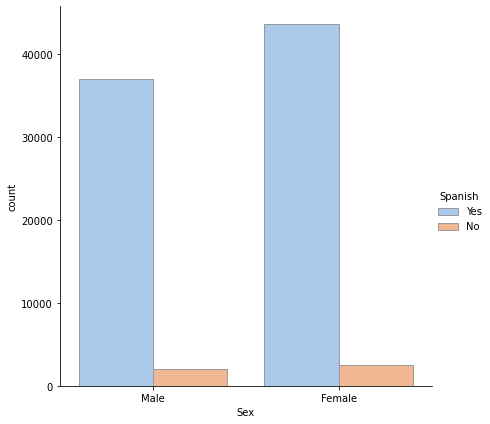

In [9]:
#https://seaborn.pydata.org/tutorial/categorical.html
sns.catplot(x="Sex", hue="Spanish", kind="count",
            palette="pastel", edgecolor=".6",
            data=df_people, height=6)

### Technical Note: how to visualize a contingency table?

* MosaicPlot: versions found so far are quite ugly and poorly customable. Used as a temporary solution

* Treeplot: to try squarified or treemap in plotly; I have to understand how to wrangle data 

import plotly.express as px
fig = px.treemap(df_people, 
                 path=['C4NAC', 'Sex'],
                values='Sex')
fig.show()    


<Figure size 432x432 with 0 Axes>

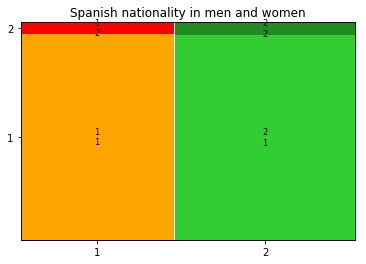

In [11]:
#mosaic(people, ['C2SEXO', 'C4NAC'],
#       labelizer=lambda k: '',
#       properties=props)
#plt.show()
#help(mosaic)
from statsmodels.graphics.mosaicplot import mosaic

plt.figure(figsize=(6,6))

#props = lambda key: {'color': 'orange' if people['Sex']=='Male' else 'gray'}
#>>> labelizer = lambda k: {('a',): 'first', ('b',): 'second',
#>>> mosaic(data, title='colored dictionary', properties=props,
#...        labelizer=labelizer)

props = {}
props[('1', '1')] = {'color': 'orange'}
props[('1', '2')] = {'color': 'red'}
props[('2', '1')] = {'color': 'limegreen'}
props[('2', '2')] = {'color': 'forestgreen'}


#props[('yes','no')] = {'facecolor': 'xkcd:pale blue',
#                       'edgecolor':'xkcd:light grey',
#                       'hatch':'o'}

#mosaic(people, ['C2SEXO', 'C4NAC'], title='Spanish nationality in men and women', properties=props)
mosaic(df_people, ['C2SEXO', 'C4NAC'], title='Spanish nationality in men and women', 
      properties=props)

plt.show()

#### 2.3 Observations

 * The % of non-Spanish people is around 5.2%
 * The % is just slightly higher in females

### 3. Age

#### 3.1 Overall distribution

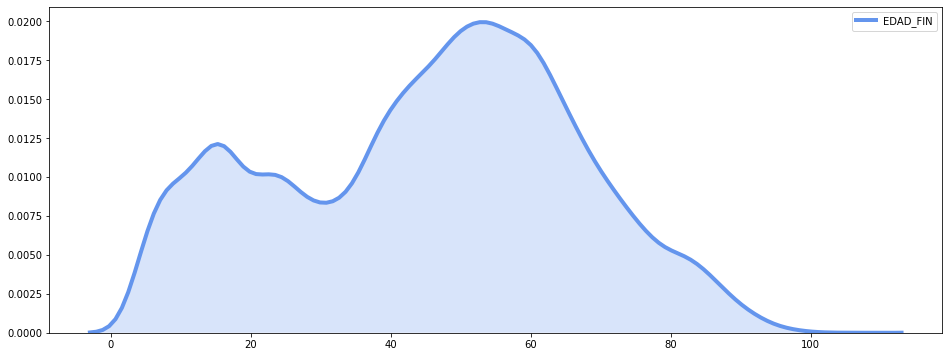

In [12]:
plt.figure(figsize=(16,6))

sns.kdeplot(df_people['EDAD_FIN'], shade=True, color='cornflowerblue', linewidth=4)

#### 3.2 Stratification in males and females

In [13]:
df_people[['EDAD_FIN', 'Sex']].groupby("Sex").describe()

EDAD_FIN                                                    
          count       mean        std  min   25%   50%   75%    max
Sex                                                                
Female  46055.0  46.954598  20.526151  4.0  33.0  49.0  61.0  106.0
Male    39009.0  43.410110  21.897516  4.0  24.0  46.0  60.0  106.0

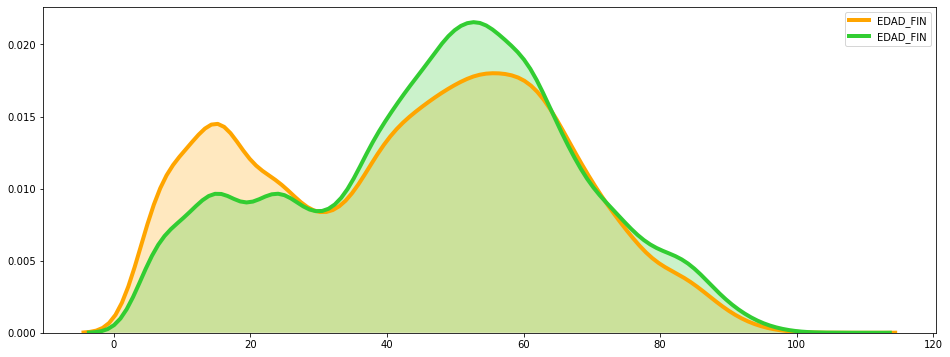

In [14]:
plt.figure(figsize=(16,6))

sns.kdeplot(df_people[df_people['Sex']=='Male']['EDAD_FIN'], shade=True, color='orange', linewidth=4)
sns.kdeplot(df_people[df_people['Sex']=='Female']['EDAD_FIN'], shade=True, color='limegreen', linewidth=4)


#### 3.3 Observations

 * There are two emerging age-groups: first peak just before 20; second around 50
 * Females are more numerous in the second group (less female students??; 'professional' males less likely to use public transportation?)

## 4. Family

### 4.1 Number of family members

In [15]:
df_people[['A1PER', 'Sex']].groupby("Sex").describe()

A1PER                                              
          count      mean       std  min  25%  50%  75%   max
Sex                                                          
Female  46055.0  3.118923  1.251842  1.0  2.0  3.0  4.0  10.0
Male    39009.0  3.252813  1.232327  1.0  2.0  3.0  4.0  10.0

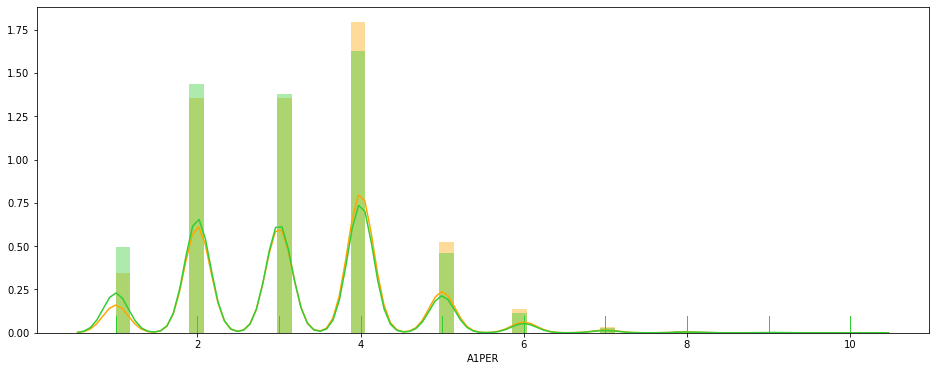

In [17]:
# IMPROVE VISUALIZATION
plt.figure(figsize=(16,6))
sns.distplot(df_people[df_people['Sex']=='Male']['A1PER'], rug=True, color='orange')
sns.distplot(df_people[df_people['Sex']=='Female']['A1PER'], rug=True, color='limegreen')

#sns.kdeplot(people[people['Sex']=='Male']['A1PER'], shade=False, color='orange', linewidth=4)
#sns.distplot(df_people[df_people['Sex']=='Male']['A1PER'],  color='orange', linewidth=4)
#sns.kdeplot(df_people[df_people['Sex']=='Female']['A1PER'], shade=False, color='limegreen', linewidth=4)


In [19]:
pd.crosstab(df_people['Sex'], df_people['A1PER'], margins=True, normalize='index')

A1PER,1,2,3,4,5,6,7,8,9,10
Sex,,,,,,,,,,
Female,0.088655,0.258778,0.248572,0.292715,0.082792,0.020714,0.005168,0.001802,0.000738,0.000065
Male,0.062652,0.243662,0.243944,0.322746,0.093953,0.024302,0.006229,0.001923,0.000436,0.000154
All,0.076730,0.251846,0.246450,0.306487,0.087910,0.022360,0.005655,0.001857,0.000600,0.000106


### 4.2 Number of children

I generate a new boolean variable relative to the presence of at least one child age ....

In [20]:
df_people['Children'] = (df_people.A1PER - df_people.A2PER4) > 0
df_people[['Children', 'Sex']].groupby("Sex").describe()

Children                     
          count unique    top   freq
Sex                                 
Female    46055      2  False  42176
Male      39009      2  False  35641

In [21]:
pd.crosstab(df_people['Sex'], df_people['Children'], margins=True, normalize='index')

Children,False,True
Sex,,
Female,0.915775,0.084225
Male,0.913661,0.086339
All,0.914805,0.085195


### 4.3 Observations

* Females reports slightly more frequently small families (1-2)
* Around 8% of families report the presence of small children; the % is very similar in males and females. 

## 5. Education Level

### 5.1 Recode

In [23]:
conditions = [
    df_people['C7ESTUD'] == 1,
    df_people['C7ESTUD'] == 2, 
    df_people['C7ESTUD'] == 3, 
    df_people['C7ESTUD'] == 4, 
    df_people['C7ESTUD'] == 5, 
    df_people['C7ESTUD'] == 6, 
    df_people['C7ESTUD'] == 7
]

outputs = [
    'NoPrimary', 'Primary', 'Secondary1', 'Secondary2', 'PostSecondary', 'Teaching', 'University'
]

df_people['Education'] = np.select(conditions, outputs) 

In [24]:
pd.crosstab(df_people['Sex'], df_people['Education'], margins=True, normalize='index')

Education,NoPrimary,PostSecondary,Primary,Secondary1,Secondary2,Teaching,University
Sex,,,,,,,
Female,0.092042,0.032961,0.139941,0.140115,0.212941,0.090783,0.291217
Male,0.114076,0.033326,0.134636,0.139609,0.206850,0.097260,0.274244
All,0.102147,0.033128,0.137508,0.139883,0.210148,0.093753,0.283434


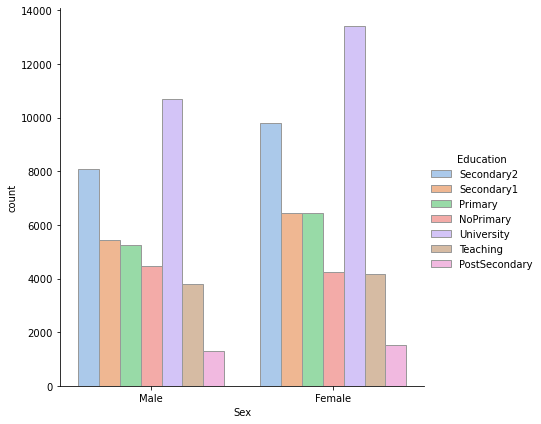

In [29]:
sns.catplot(x="Sex", hue="Education", kind="count",
            palette="pastel", edgecolor=".6",
            data=df_people, height=6)

<Figure size 1008x1008 with 0 Axes>

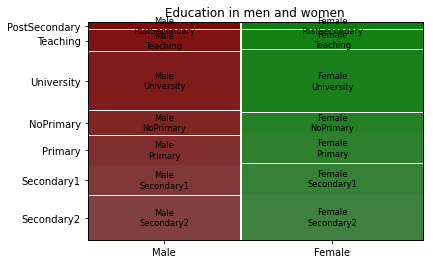

In [30]:
props = {}
props['1'] = {'color': 'orange'}
props['2'] = {'color': 'limegreen'}

plt.figure(figsize=(14,14))
mosaic(df_people, ['Sex', 'Education'], title='Education in men and women', properties=props)
#mosaic(people, ['Sex', 'Education'])
plt.show()

## 6. Activity

In [31]:
conditions = [
    df_people['C8ACTIV'] == 1,
    df_people['C8ACTIV'] == 2, 
    df_people['C8ACTIV'] == 3, 
    df_people['C8ACTIV'] == 4, 
    df_people['C8ACTIV'] == 5, 
    df_people['C8ACTIV'] == 6, 
    df_people['C8ACTIV'] == 7,
    df_people['C8ACTIV'] == 8,
    df_people['C8ACTIV'] == 9,
]

outputs = [
    'Work', 'Work_Study', 'Retired', 'Unempl', 'Unempl_1', 'Student', 'FamilyCare', 
    'DomesticWork', 'Other'
]

df_people['Activity'] = np.select(conditions, outputs) 

df_people['Activity'].value_counts()

Work            36214
Student         17514
Retired         17076
Unempl           6452
DomesticWork     4352
Work_Study       1730
Other            1040
FamilyCare        390
Unempl_1          296
Name: Activity, dtype: int64

In [32]:
pd.crosstab(df_people['Sex'], df_people['Activity'], margins=True, normalize='index')

Activity,DomesticWork,FamilyCare,Other,Retired,Student,Unempl,Unempl_1,Work,Work_Study
Sex,,,,,,,,,
Female,0.093627,0.008077,0.015156,0.188622,0.172055,0.089458,0.003561,0.407513,0.021930
Male,0.001025,0.000461,0.008767,0.215053,0.245841,0.059781,0.003384,0.447230,0.018457
All,0.051161,0.004585,0.012226,0.200743,0.205892,0.075849,0.003480,0.425727,0.020338


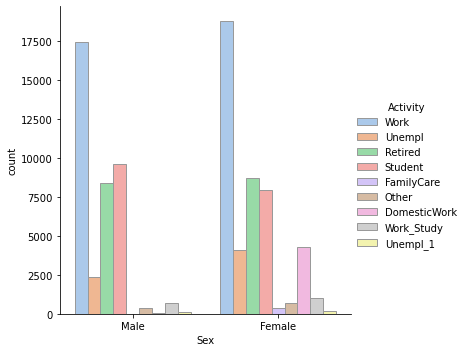

In [34]:
sns.catplot(x="Sex", hue="Activity", kind="count",
            palette="pastel", edgecolor=".6",
            data=df_people)

## 7. Professional Activity: Sector

In [ ]:
conditions = [
    df_people['C10SECTOR'] == 1,
    df_people['C10SECTOR'] == 2, 
    df_people['C10SECTOR'] == 3, 
    df_people['C10SECTOR'] == 4, 
    df_people['C10SECTOR'] == 5, 
    df_people['C10SECTOR'] == 6, 
    df_people['C10SECTOR'] == 7
]

outputs = [
    'Education', 'Health_Social', 'PublicAdmin', 'Other', 'Industry', 'Construction', 'Agriculture'
]

df_people['Sector'] = np.select(conditions, outputs, 'No') 

df_people['Sector'].value_counts()

In [ ]:
pd.crosstab(df_people['Sex'], df_people['Sector'], margins=True, normalize='index')

## 8. Driver licence

 * 1 No
 * 2 Ciclomotor
 * 3 Moto
 * 4 Car or more
 * 5 More than one

In [35]:
conditions = [
    df_people['C6CARNE'] == 1,
    df_people['C6CARNE'] == 2, 
    df_people['C6CARNE'] == 3, 
    df_people['C6CARNE'] == 4, 
    df_people['C6CARNE'] == 5 
   ]

outputs = [
    'No', 'Ciclomotor', 'Moto', 'Car', 'More']

df_people['Licence'] = np.select(conditions, outputs) 

df_people['Licence'].value_counts()

Car           48185
No            32297
More           4379
Moto            152
Ciclomotor       51
Name: Licence, dtype: int64

In [38]:
pd.crosstab(df_people['Sex'], df_people['Licence'], margins=True, normalize='index')

Licence,Car,Ciclomotor,More,Moto,No
Sex,,,,,
Female,0.542873,0.000434,0.016328,0.001346,0.439019
Male,0.594299,0.000795,0.092979,0.002307,0.309621
All,0.566456,0.000600,0.051479,0.001787,0.379679


## 9. Vehicle characteristics

In [39]:
conditions = [
    df_people['V3B12CARB1'] == 1,
    df_people['V3B12CARB1'] == 2, 
    df_people['V3B12CARB1'] == 3 
   ]

outputs = [
    'Hybrid', 'Electric', 'Conventional']

df_people['Vehicle'] = np.select(conditions, outputs) 

df_people['Vehicle'].value_counts()

0               75701
Conventional     9199
Hybrid            112
Electric           52
Name: Vehicle, dtype: int64

In [41]:
# Considering only the ones having a vehicle
pd.crosstab(df_people[df_people.Vehicle != '0'].Sex, df_people[df_people.Vehicle != '0'].Vehicle, margins=True, normalize='index')

#V3B12CARB1




Vehicle,Conventional,Electric,Hybrid
Sex,,,
Female,0.982174,0.005369,0.012457
Male,0.982792,0.005736,0.011472
All,0.982484,0.005554,0.011962
